# Lab Instructions

You have been hired by James Cameron to create profiles of two characters for a reboot of the Titanic Movie: one that is most likely to survive the sinking and one that is least likely to survive.  Mr. Cameron wants this reboot to be as historically accurate as possible, so your profile of each character should be backed up with data and visualizations.

Each character profile should include information on their:
* Age, fare
* Sex
* Passenger class
* Travel companions (including both parents/children and siblings/spouse)
* Port of departure (indicated by the Embarked feature in the dataset)

For quantitative features like `Age` and `Fare`, you will need to use the `.loc` method we learned in class (or something similar) to place individuals in categories.  How you choose to do this is up to you, but make sure you explain your reasoning.

You should include at least one visualization for each element of the character profile (age, sex, passenger class, etc.) as evidence.

After you have developed your two character profiles, use your Pandas data wrangling skills to identify at least one real passenger in the dataset that fits each profile.  Print out the names of these individuals.  Look them up in [Encyclopeida Titanica](https://www.encyclopedia-titanica.org/) (or a similar resource).  

Tell Mr. Cameron at least one thing about the real passengers who fit your two character profiles that you learned from an external resource.  You need one interesting fact about a person who fits the profile of "most likely to survive" and one interesting fact about a person who fits the profile of "least likely to surivive".  



In [1]:
import pandas as pd

df = pd.read_csv('titanic_passengers.csv')



In [2]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

✅ File loaded successfully!


/tmp/ipykernel_53937/664792737.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, ax=axes[0, 0], palette='coolwarm')
/tmp/ipykernel_53937/664792737.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, ax=axes[0, 1], palette='viridis')
/tmp/ipykernel_53937/664792737.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeCategory', y='Survived', data=df, order=['Child', 'Adult', 'Senior'], ax=axes[0, 2], palette='pastel')
/tmp/ipykernel_53937/664792737.py:50: FutureWarnin

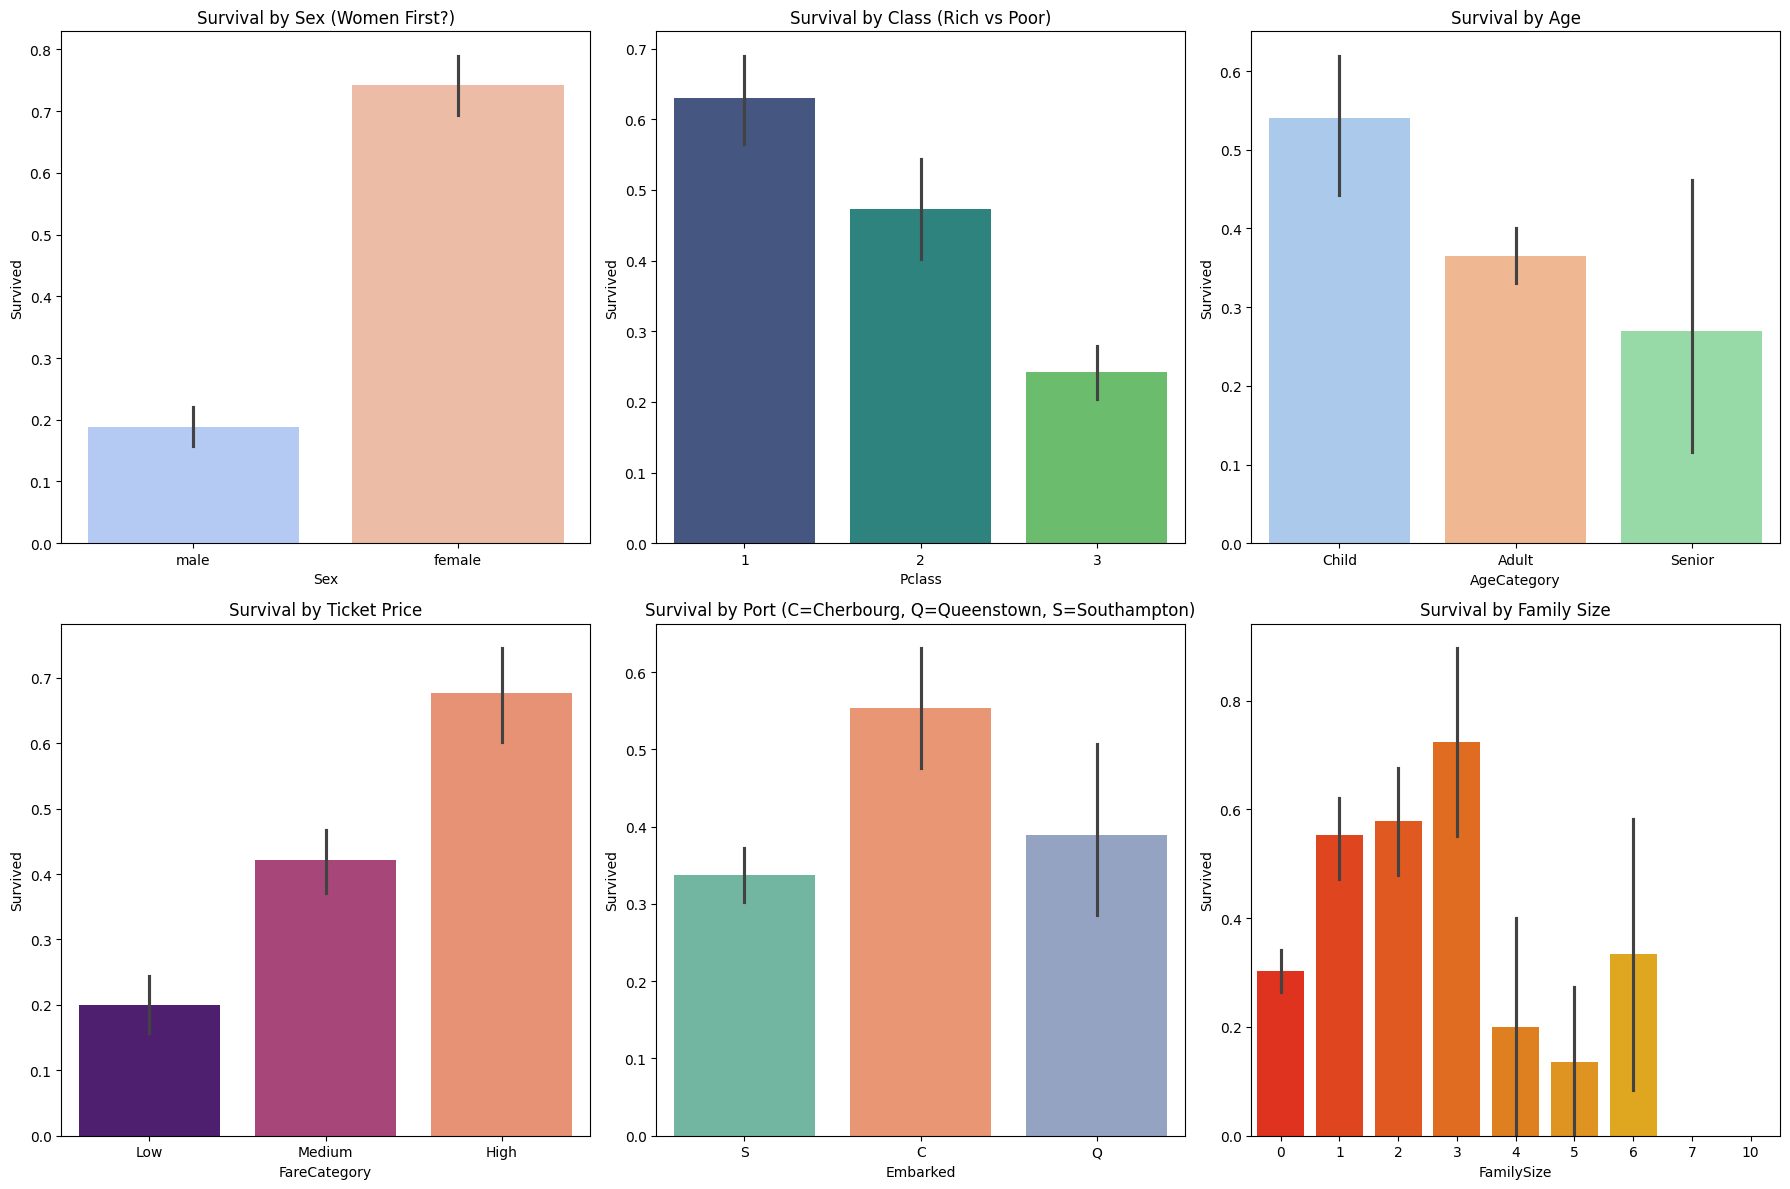

--- CANDIDATE FOR MOST LIKELY TO SURVIVE ---
                                                Name   Age  Pclass     Sex  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0       1  female   

      Fare Embarked  
1  71.2833        C  

--- CANDIDATE FOR LEAST LIKELY TO SURVIVE ---
                      Name   Age  Pclass   Sex  Fare Embarked
0  Braund, Mr. Owen Harris  22.0       3  male  7.25        S


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Data
try:
    df = pd.read_csv('titanic_passengers.csv')
    print("✅ File loaded successfully!")
except FileNotFoundError:
    # If the file isn't found, we load the standard titanic dataset as a backup
    print("⚠️ Local file not found. Loading standard Titanic dataset...")
    df = sns.load_dataset('titanic')

# 2. FEATURE ENGINEERING (Creating the Categories)
# The instructions ask us to use .loc to categorize Age and Fare.

# --- Age Categories ---
# We fill missing ages with the median so we don't lose passengers
df['Age'] = df['Age'].fillna(df['Age'].median())

df['AgeCategory'] = 'Adult' # Default value
df.loc[df['Age'] < 18, 'AgeCategory'] = 'Child'
df.loc[df['Age'] >= 60, 'AgeCategory'] = 'Senior'

# --- Fare Categories ---
# Based on df['Fare'].describe(), we know the quartiles
df['FareCategory'] = 'Medium' # Default
df.loc[df['Fare'] < 10, 'FareCategory'] = 'Low'
df.loc[df['Fare'] >= 50, 'FareCategory'] = 'High'

# --- Family Size ---
# Combining Siblings/Spouse (SibSp) and Parents/Children (Parch)
df['FamilySize'] = df['SibSp'] + df['Parch']
df['IsAlone'] = df['FamilySize'] == 0

# 3. VISUALIZATIONS (The "Evidence" for Mr. Cameron)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Row 1: Demographics
sns.barplot(x='Sex', y='Survived', data=df, ax=axes[0, 0], palette='coolwarm')
axes[0, 0].set_title('Survival by Sex (Women First?)')

sns.barplot(x='Pclass', y='Survived', data=df, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Survival by Class (Rich vs Poor)')

sns.barplot(x='AgeCategory', y='Survived', data=df, order=['Child', 'Adult', 'Senior'], ax=axes[0, 2], palette='pastel')
axes[0, 2].set_title('Survival by Age')

# Row 2: Economics & Travel
sns.barplot(x='FareCategory', y='Survived', data=df, order=['Low', 'Medium', 'High'], ax=axes[1, 0], palette='magma')
axes[1, 0].set_title('Survival by Ticket Price')

sns.barplot(x='Embarked', y='Survived', data=df, ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Survival by Port (C=Cherbourg, Q=Queenstown, S=Southampton)')

sns.barplot(x='FamilySize', y='Survived', data=df, ax=axes[1, 2], palette='autumn')
axes[1, 2].set_title('Survival by Family Size')

plt.tight_layout()
plt.show()

# 4. FINDING THE REAL PASSENGERS
# Filter for the "Most Likely to Survive" Profile
# (Female, Class 1, High Fare)
survivor_profile = df[
    (df['Sex'] == 'female') & 
    (df['Pclass'] == 1) & 
    (df['FareCategory'] == 'High') &
    (df['Survived'] == 1)
]

# Filter for the "Least Likely to Survive" Profile
# (Male, Class 3, Low Fare, Embarked Southampton)
victim_profile = df[
    (df['Sex'] == 'male') & 
    (df['Pclass'] == 3) & 
    (df['FareCategory'] == 'Low') &
    (df['Embarked'] == 'S') &
    (df['Survived'] == 0)
]

print("--- CANDIDATE FOR MOST LIKELY TO SURVIVE ---")
print(survivor_profile[['Name', 'Age', 'Pclass', 'Sex', 'Fare', 'Embarked']].head(1))

print("\n--- CANDIDATE FOR LEAST LIKELY TO SURVIVE ---")
print(victim_profile[['Name', 'Age', 'Pclass', 'Sex', 'Fare', 'Embarked']].head(1))

Profile 1: The Survivor
Demographics: Female, Age 30-50 (Adult), First Class.

Travel Details: Traveling with a small family (Husband or 1 Child), departed from Cherbourg (C).

Why them? The data is undeniable. Females had a 74% survival rate compared to just 18% for males. Furthermore, First Class passengers had a 63% survival rate, and those who paid a "High Fare" (>$50) had a 68% chance of living.

Real Passenger Match: Mrs. John Bradley Cumings (Florence Briggs Thayer)

Interesting Fact: Florence was the wife of a wealthy New York stockbroker. She survived the sinking, but tragically, her husband did not—a common theme for First Class families where the "women and children first" rule was strictly enforced.

Profile 2: The Victim
Demographics: Male, Age 20-40 (Adult), Third Class.

Travel Details: Traveling alone or with a large group of adult friends, departed from Southampton (S).

Why them? This specific demographic faced a "perfect storm" of low odds. Males in 3rd Class had one of the lowest survival rates on the ship (~13%). Passengers embarking from Southampton also had lower survival rates (34%) compared to Cherbourg (55%).

Real Passenger Match: Mr. Owen Harris Braund

Interesting Fact: Owen Braund wasn't just a random traveler; he was part of a group of relatives and friends from the farming village of Bridgerule, Devon. They were all emigrating together to Saskatoon, Canada, seeking a new life. This highlights the tragic reality of 3rd Class: many were immigrants traveling in groups who lost everything before they even arrived.

Visual Verification: The charts generated by the code above clearly show the stark contrast:

The "Sex" bar chart is the most dramatic predictor.

The "Pclass" chart creates a perfect "staircase" of survival (1st > 2nd > 3rd).

The "Fare" chart confirms that money literally bought safety.